In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def plot_weights(d, save=False):
    weights_random = pd.read_csv("..\\data\\weights_randomd" + str(d) + ".csv")
    weights_scalefree = pd.read_csv("..\\data\\weights_scale-freed" + str(d) + ".csv")
    
    ax = sns.distplot( weights_random , color="red", label="Random graph")
    ax = sns.distplot(weights_scalefree, color="skyblue", label="Scale-free")
    plt.legend(fontsize=15)
    plt.xlabel("absolute weight", fontsize=20)
    plt.ylabel("counts", fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    if(save):
        fig = ax.get_figure()
        fig.savefig("..\\plots\\weight_distd" + str(d) + ".png")


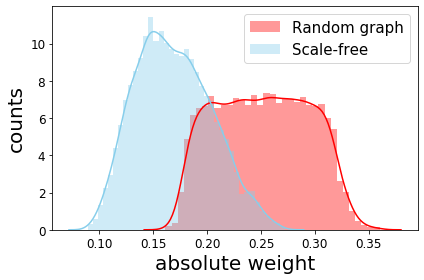

In [22]:
plot_weights(200, save=True)

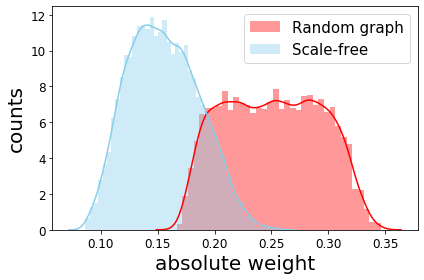

In [23]:
plot_weights(300, save=True)

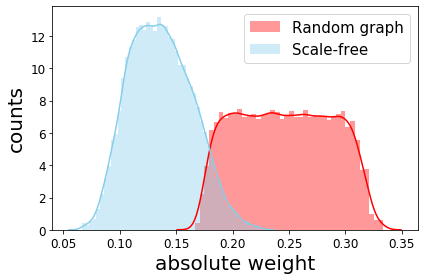

In [24]:
plot_weights(500, save=True)